# Principle Component Analysis of US States by Demographic Charateristics

## Import Packages

In [58]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as mc

## Import Data

In [5]:
states = pd.read_csv('../input/state_abbreviations.csv')
demographics = pd.read_csv('../input/state_demographics.csv')
gun_ownership = pd.read_csv('../input/gun_ownership.csv')
obesity = pd.read_csv('../input/obesity_statistics.csv')
unemployment = pd.read_csv('../input/unemployment_statistics.csv')
election_results_2012 = pd.read_csv('../input/election_results_2012.csv')
election_results_2016 = pd.read_csv('../input/election_results_2016.csv')
election_polls_2016 = pd.read_csv('../input/election_polls_2016.csv')

## Pre-processing and Functions

In [6]:
df = pd.merge(states, demographics, on = 'state')
df = pd.merge(df, gun_ownership, on = 'state')
df = pd.merge(df, obesity, on = 'state')
df = pd.merge(df, unemployment, on = 'state')
df = pd.merge(df, election_results_2012, on = 'state')
df = pd.merge(df, election_results_2016, on = 'state')
df = pd.merge(df, election_polls_2016, on = 'state')

In [7]:
df['winner_2012'] = np.where(df['pct_obama_2012']>df['pct_romney_2012'], "D", "R")
df['winner_2016'] = np.where(df['pct_clinton_2016']>df['pct_trump_2016'], "D", "R")
df['poll_error_trump_2016'] = df['pct_trump_2016'] - df['poll_trump_2016']

In [8]:
swing_states = ['Arizona', 'Colorado', 'Florida', 'Georgia', 'Iowa', 'Michigan', 'Minnesota', 'Nevada', 'NewHampshire'
                , 'NewMexico', 'NorthCarolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Virginia', 'Wisconsin']
pca_vars = ['age_18_29', 'age_30_44', 'age_45_64', 'age_Over65', 'white', 'african_american', 'latino'
            , 'poverty_rate', 'hh_income_over100k_rate', 'unemployment_rate'
            , 'college_educated_rate', 'gun_ownership_rate', 'adult_obesity_rate']
proj_vars = ['pct_clinton_2016', 'pct_trump_2016', 'poll_error_trump_2016', 'pct_obama_2012', 'pct_romney_2012']
info_vars = ['state', 'abbreviation', 'winner_2012', 'winner_2016']

In [9]:
def data_processing(df):
    X = df[pca_vars]
    info = df[info_vars]
    return X, info

In [10]:
def pca_analysis(X, components = 2):
    X_std = StandardScaler().fit_transform(X)
    sklearn_pca = sklearnPCA(n_components = components)
    c_alpha = sklearn_pca.fit_transform(X_std)
    d_alpha = sklearn_pca.transform(np.eye(len(pca_vars)))
    return c_alpha, d_alpha

In [220]:
def pca_plot(pca_x, pca_y, vars_x, vars_y, lines, color, name, axes = [1,2]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (26,13))
    
    ax1.scatter(pca_x, pca_y, c = color)
    ax1.scatter(vars_x, vars_y, c = 'black', marker = 'x') 
    lc = mc.LineCollection(lines, colors='black', linewidths=2)
    ax1.add_collection(lc)
    for i, txt in enumerate(pca_vars):
        ax1.annotate(txt, (vars_x[i], vars_y[i]), fontsize = 15, color = 'black');
    ax1.set_xlabel('PCA Axis {}'.format(axes[0]), fontsize = 20)
    ax1.set_ylabel('PCA Axis {}'.format(axes[1]), fontsize = 20)
    
    ax2.scatter(vars_x, vars_y, c = 'grey', marker = 'x')
    for i, txt in enumerate(pca_vars):
        ax2.annotate(txt, (vars_x[i], vars_y[i]), fontsize = 13, color = 'grey');
    lc = mc.LineCollection(lines, colors='grey', linewidths=2)
    ax2.add_collection(lc)
    ax2.scatter(pca_x, pca_y, c = color)
    for i, txt in enumerate(name):
        ax2.annotate(txt, (pca_x[i], pca_y[i]), fontsize = 15, color = 'black');
    ax2.set_xlabel('PCA Axis {}'.format(axes[0]), fontsize = 20)
    ax2.set_ylabel('PCA Axis {}'.format(axes[1]), fontsize = 20)
    
    fig.suptitle('Principal Component Analysis of US States', fontsize=35)

In [221]:
def votes_plot(c_alpha, d_alpha, info, scale_factor = 1):
    pca_x = c_alpha[:,0]
    pca_y = c_alpha[:,1]
    vars_x = scale_factor*d_alpha[:,0]
    vars_y = scale_factor*d_alpha[:,1]
    lines = []
    for i in range(len(pca_vars)):
        lines.append([(0, 0), (scale_factor*d_alpha[:,0][i], scale_factor*d_alpha[:,1][i])])

    color = np.where(info['winner_2016'] == 'R', 'red', 'blue')
    name = info['abbreviation']
    
    pca_plot(pca_x, pca_y, vars_x, vars_y, lines, color, name)

In [222]:
def poll_plot(c_alpha, d_alpha, info, scale_factor = 1):
    pca_x = c_alpha[:,1]
    pca_y = c_alpha[:,2]
    vars_x = scale_factor*d_alpha[:,1]
    vars_y = scale_factor*d_alpha[:,2]
    lines = []
    for i in range(len(pca_vars)):
        lines.append([(0, 0), (scale_factor*d_alpha[:,1][i], scale_factor*d_alpha[:,2][i])])

    color = data['poll_error_trump_2016']
    name = info['abbreviation']
    
    pca_plot(pca_x, pca_y, vars_x, vars_y, lines, color, name, axes = [2,3])

## USA Analysis

In [223]:
data = df[df['abbreviation']!="DC"].reset_index(drop = True)

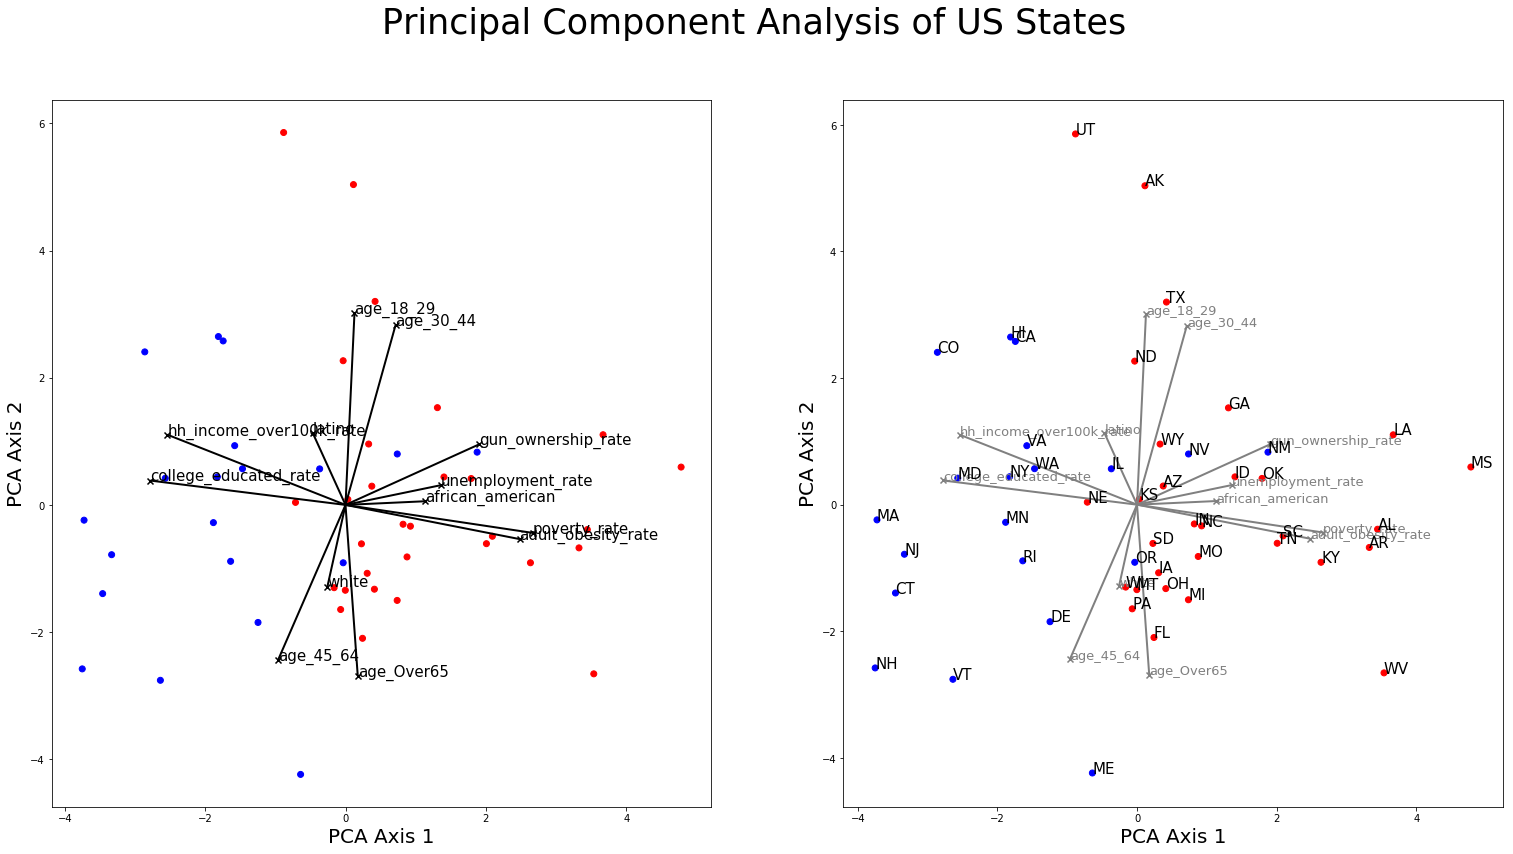

In [224]:
X = data_processing(data)[0]
info = data_processing(data)[1]
c_alpha = pca_analysis(X)[0]
d_alpha = pca_analysis(X)[1]
votes_plot(c_alpha, d_alpha, info, scale_factor=6)

## Swing State Analysis

In [225]:
data = df[df['state'].apply(lambda x: x in swing_states)].reset_index(drop = True)

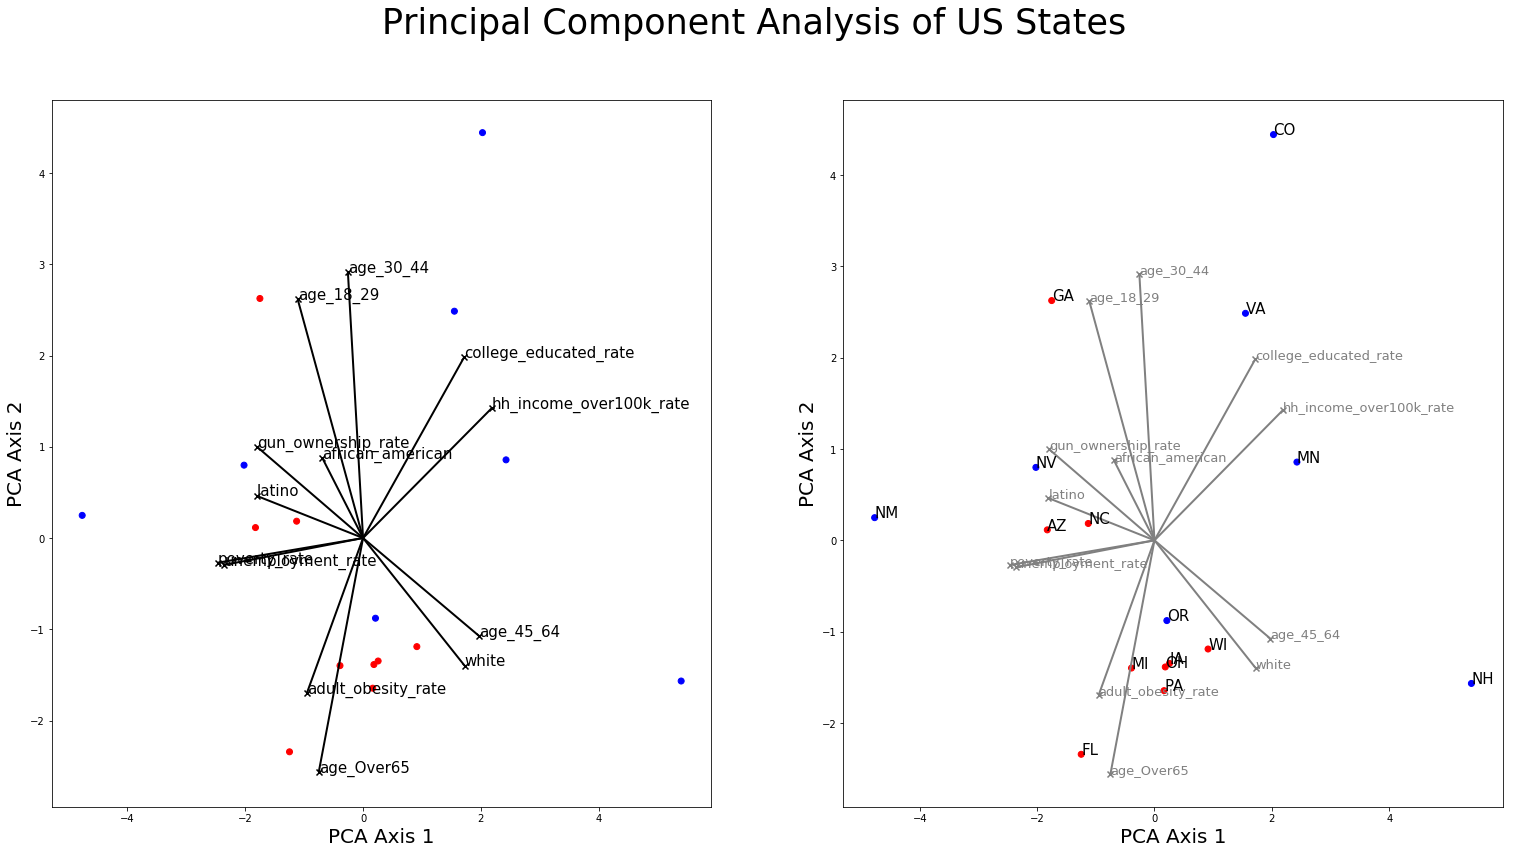

In [226]:
X = data_processing(data)[0]
info = data_processing(data)[1]
c_alpha = pca_analysis(X)[0]
d_alpha = pca_analysis(X)[1]
votes_plot(c_alpha, d_alpha, info, scale_factor=6)

## Polling Error Analysis

In [227]:
data = df[df['state'].apply(lambda x: x in swing_states)].reset_index(drop = True)

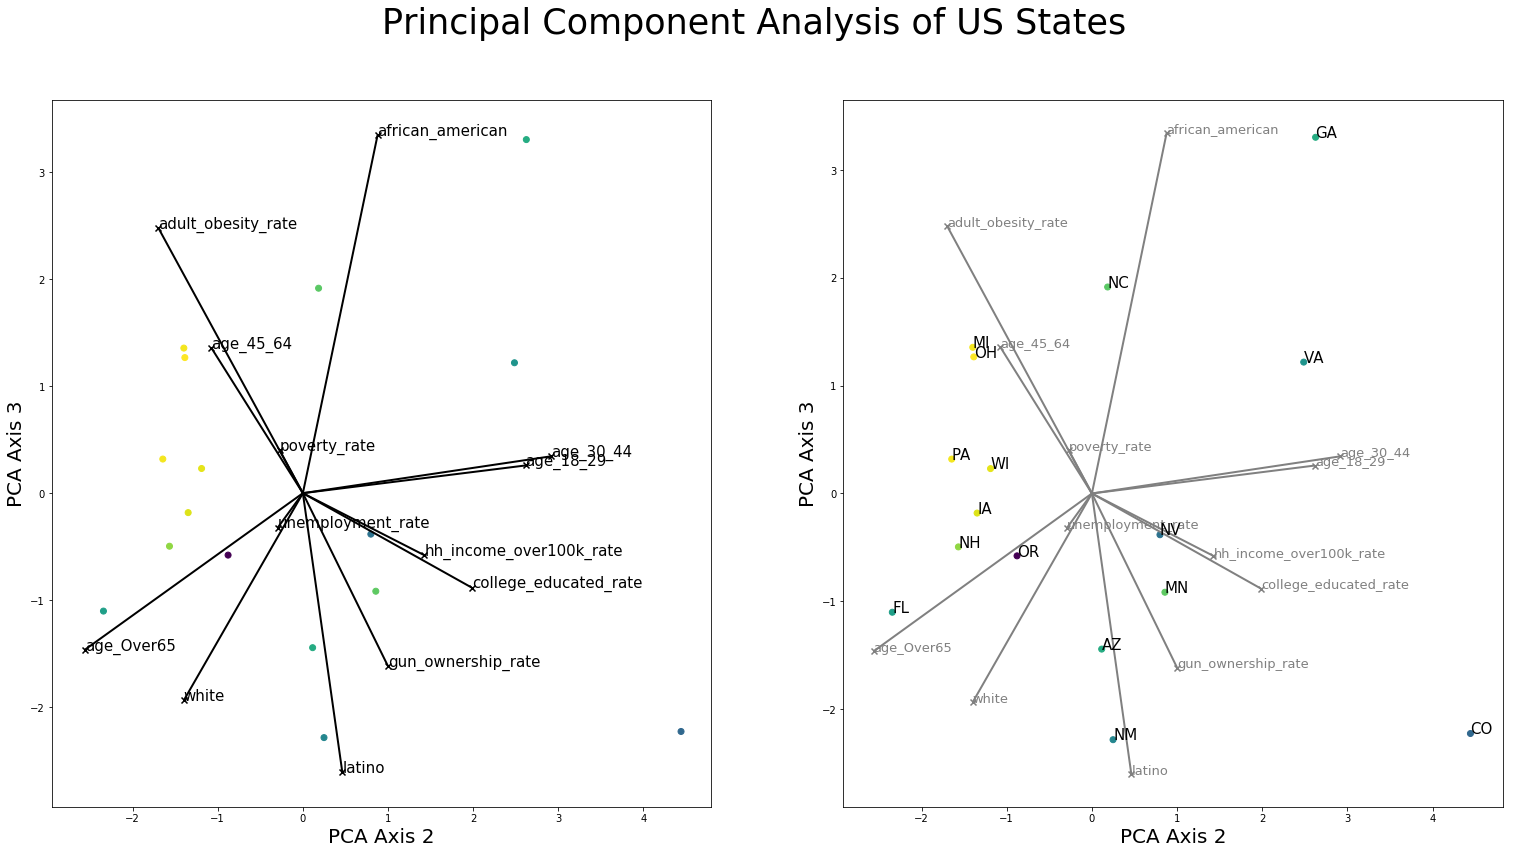

In [228]:
X = data_processing(data)[0]
info = data_processing(data)[1]
c_alpha = pca_analysis(X, components=3)[0]
d_alpha = pca_analysis(X, components=3)[1]
poll_plot(c_alpha, d_alpha, info, scale_factor=6)